In [1]:
import strongholds

import numpy as np

import matplotlib.pyplot as plt

default_rng = np.random.default_rng(0)

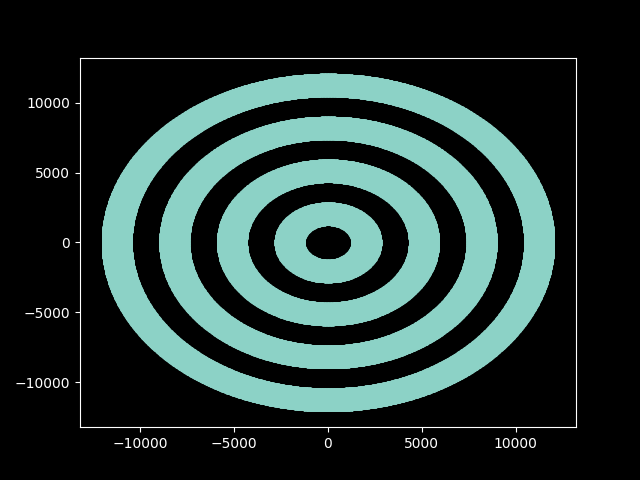

In [2]:
%matplotlib widget

fig, ax = plt.subplots()

ax.scatter(*strongholds.generation_grid(ring_nums=range(4)).T, s=0.2)

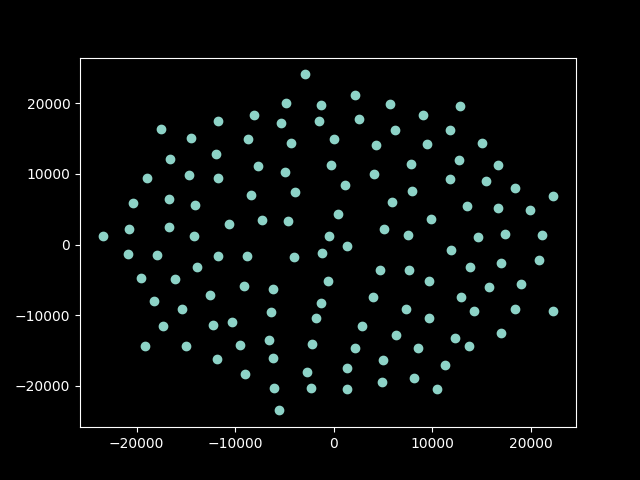

In [3]:
fig2, ax2 = plt.subplots()
ax2.scatter(*strongholds.generate_all().T)

In [4]:
player = strongholds.rectpoint(3000, -300)

all_strongholds = strongholds.generate_all()

target = strongholds.closest_stronghold(player, all_strongholds)
target

array([1416.,  328.])

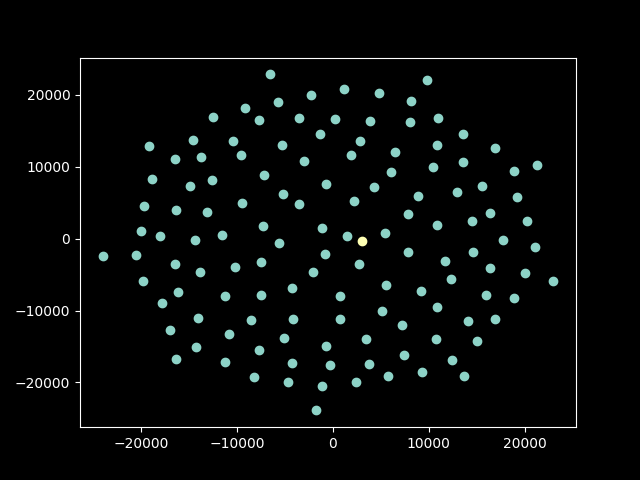

In [5]:
fig3, ax3 = plt.subplots()
ax3.scatter(*all_strongholds.T)
ax3.scatter(*player)

In [6]:
throw_angle = strongholds.geometry.angle(target - player)
throw_angle

-1.1933413787469642

In [7]:
grid = strongholds.generation_grid(range(2))
possible_targets = strongholds.points_in_cone(player, grid, throw_angle, 1e-4, error_is_relative=False)
possible_targets

array([[-5080.,  2904.],
       [-5000.,  2872.],
       [-4920.,  2840.],
       [-4840.,  2808.],
       [-4760.,  2776.],
       [-4680.,  2744.],
       [-4232.,  2568.],
       [-4152.,  2536.],
       [-4072.,  2504.],
       [-3992.,  2472.],
       [-3912.,  2440.],
       [-3832.,  2408.],
       [-2136.,  1736.],
       [-2056.,  1704.],
       [-1368.,  1432.],
       [-1288.,  1400.],
       [-1208.,  1368.],
       [ 1416.,   328.]])

In [31]:
ring_map = strongholds.generation_heatmap(1*10**5, range(4), default_rng)

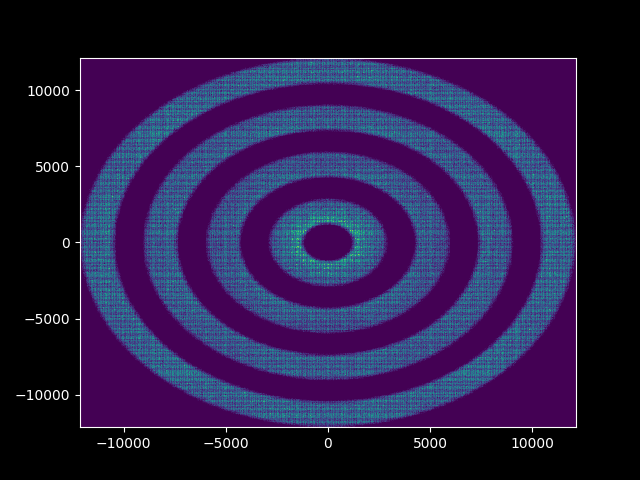

In [32]:
fig4, ax4 = plt.subplots()

ring_hist2d = ax4.hist2d(*ring_map.T, bins=600)

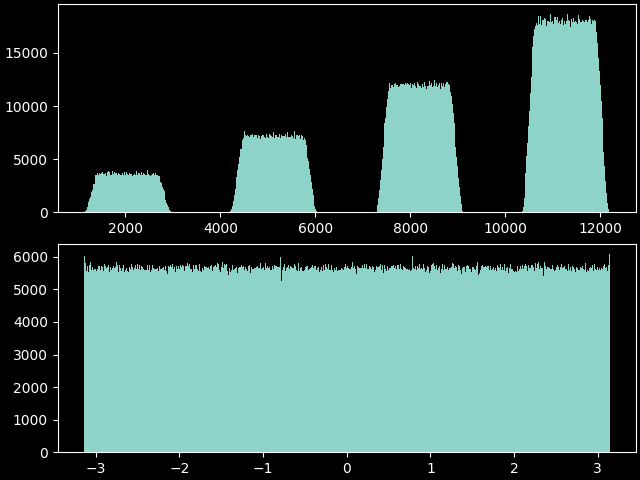

In [33]:
fig5, ax5 = plt.subplots(2, 1, constrained_layout=True)

ring_r, ring_phi = strongholds.geometry.to_polar(ring_map).T

ring_r_hist = ax5[0].hist(ring_r, bins=600)
ring_phi_hist = ax5[1].hist(ring_phi, bins=600)